<a href="https://colab.research.google.com/github/emerenan/Desafio_Tiendanube/blob/master/Desafio_Tiendanube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gp_chat    Não   Sim
platform            
Android    250    42
Web       8997  2086
iOS         74    10




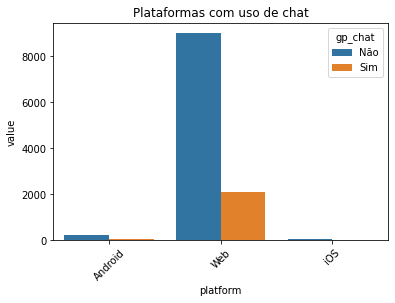

platform           Android    Web  iOS
gp_segment                            
medium-seller            0      9    1
no-seller              263  10807   55
small-seller             1     13    7
struggling-seller       23    214   13
tiny-seller              5     40    7
top-seller               0      0    1




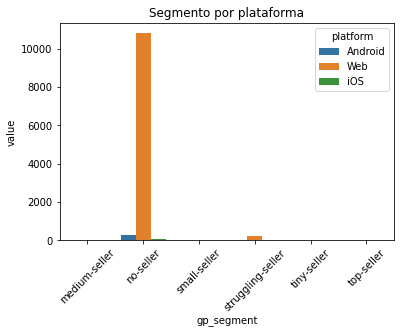

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Método para contagem
def count_entries(df, col_name):
    """Retorna um dicionario com a contagem de ocorrências de cada chave
    
    Parametros \n

    :param df: o dataframe base. \n
    :param col_name: o nome da coluna que terá os valores contados. \n

    """
    cols_count = {}

    try:
        col = df[col_name]

        for entry in col:
            if entry in cols_count.keys():
                cols_count[entry] += 1
            else:

                cols_count[entry] = 1

        return cols_count

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

# Método para converter a coluna float64 para str
def bool_trans(df, column, val_true, val_false):
    """ Método para transformar as colunas que estão em float64 para strings categóricas
    
    Parametros
    :param df: o dataframe base. \n
    :param column: o nome da coluna que terá os valores modificados. \n
    :param val_true: o text para o valores que forem True. \n
    :param val_false: o text para o valores que forem False. \n
    """
    list = []

    for row in df[column].values:
        if row == 1.0:
            row = val_true
            list.append(row)
        else:
            row = val_false
            list.append(row)
    df[column] = list

# Método para imprimir um cruzamento mais o gráfico
def cross_plt(df, colx, collegend, title):
    """ Método para imprimir uma plotagem de cruzamento de colunas contaveis

    Paramentros \n
    :param df: o dataframe base. \n
    :param colx: a lista de nomes do eixo x. \n
    :param collegend: a lista de nomes que serão a legenda. \n
    :param title: o título do gráfico. \n

    """
    cross = pd.crosstab(df[colx], df[collegend])
    print(cross)
    stack = cross.stack().reset_index().rename(columns={0: 'value'})
    sns.barplot(x=stack[colx],
                y=stack.value,
                hue=stack[collegend])
    plt.xticks(rotation=45)
    plt.title(title) 
    plt.show()


# Método de plotagem em categoria
def cat_plot(df, coluna, title, labelx, labely, legenda):

    g = sns.catplot(x=coluna, data=df, kind='count', hue=legenda)
    plt.title(title, y=1.03)
    g.set(xlabel=labelx, ylabel=labely)
    plt.xticks(rotation=45)
        
    return plt.show()


columns = ['amplitude_id', 'user_id', 'carrier', 'city', 'country', 'device',
       'device_type', 'dma', 'language', 'library', 'os', 'paying', 'platform',
       'region', 'start_version', 'version', 'gp_brick_and_mortars',
       'gp_business_size', 'gp_chat', 'gp_context', 'gp_country',
       'gp_created_at', 'gp_first_contact', 'gp_from', 'gp_initial_referrer',
       'gp_initial_referring_domain', 'gp_initial_utm_campaign',
       'gp_initial_utm_content', 'gp_initial_utm_medium',
       'gp_initial_utm_source', 'gp_initial_utm_term', 'gp_new_billing_flow',
       'gp_new_product_filter', 'gp_orders', 'gp_products', 'gp_referrer',
       'gp_referring_domain', 'gp_segment', 'gp_source', 'gp_store_id',
       'gp_theme', 'gp_trial_payment_bar', 'gp_type', 'gp_utm_campaign',
       'gp_utm_content', 'gp_utm_medium', 'gp_utm_source', 'gp_utm_term',
       'gp_vertical', 'dia_semana']

data = pd.read_excel("/content/Exercicio_1 - datos-trials-may17-BR.xlsx", names=columns)

# print(data.info())

data = data.loc[:,['amplitude_id', 'user_id', 'city', 'country', 'device', 'language', 'library', 'paying', 'platform',
                   'region', 'gp_chat', 'gp_context', 'gp_country', 'gp_created_at', 'gp_first_contact', 'gp_initial_referrer',
                   'gp_initial_referring_domain', 'gp_initial_utm_campaign', 'gp_initial_utm_medium', 'gp_initial_utm_source',
                   'gp_new_product_filter', 'gp_orders', 'gp_products', 'gp_referrer', 'gp_referring_domain', 'gp_segment',
                   'gp_source', 'gp_store_id', 'gp_theme', 'gp_trial_payment_bar', 'gp_type', 'gp_utm_campaign', 'gp_utm_medium',
                   'gp_utm_source', 'gp_vertical']]

data.fillna({'paying':0.0, 'city': 'São Paulo', 'country': 'Brazil', 
             'language': 'Portuguese', 'gp_chat':0.0, 'gp_trial_payment_bar':0.0, 
             'gp_new_product_filter':0.0, 'gp_orders':0, 'gp_products':0, 
             'gp_segment': 'no-seller', 'gp_theme': 'material', 'gp_vertical': 'other'}, inplace=True)


data.fillna('Não Definido', inplace=True)

bool_trans(data, 'paying', 'Sim', 'Não')
bool_trans(data, 'gp_chat', 'Sim', 'Não')
bool_trans(data, 'gp_trial_payment_bar', 'Sim', 'Não')
bool_trans(data, 'gp_new_product_filter', 'Sim', 'Não')

list = []
for row in data['region'].values:
    if row == 'Tocantins' or row == 'Acre' or row == 'Para' or  row == 'Rondonia' or row == 'Roraima' or row == 'Amapa' or row == 'Amazonas':
        row = 'Norte'
        list.append(row)
    elif row == 'Bahia' or row == 'Sergipe' or row == 'Alagoas' or  row == 'ParaÃ-­ba' or row == 'Pernambuco' or row == 'Rio Grande do Norte' or row == 'Ceara' or row == 'Piaui' or row == 'Maranhao':
        row = 'Nordeste'
        list.append(row)
    elif row == 'Mato Grosso' or row == 'Mato Grosso do Sul' or row == 'Goias' or row == 'Federal District':
        row = 'Centro-Oeste'
        list.append(row)
    elif row == 'Espirito Santo' or row == 'Rio de Janeiro' or row == 'Minas Gerais' or row == 'Sao Paulo':
        row = 'Sudeste'
        list.append(row)
    elif row == 'Santa Catarina' or row == 'Rio Grande do Sul' or row == 'Parana':
        row = 'Sul'
        list.append(row)
    else:
        row = 'Fora do Brasil'
        list.append(row)

data['gp_region'] = list

cross_plt(data, 'platform', 'gp_chat', 'Plataformas com uso de chat')
cross_plt(data, 'gp_segment',  'platform', 'Segmento por plataforma')
